原始数据示例：
   time  heart_rate     acc_x     acc_y     acc_z  activity
0   0.0   77.483571  0.756989  0.125225  1.901191   walking
1   0.5   74.308678 -0.922165 -0.429406 -0.060661   sitting
2   1.0   78.238443  0.869606  0.122298 -0.708407   sitting
3   1.5   82.615149  1.355638  0.543298 -1.513714  standing
4   2.0   73.829233  0.413435  0.048860 -1.803140   sitting

生成了 58 个窗口，每个窗口大小为 20 步 x 4 特征
标签示例（前5个）: ['sitting', 'standing', 'standing', 'walking', 'sitting'] -> 编码后: [0 1 1 2 0]


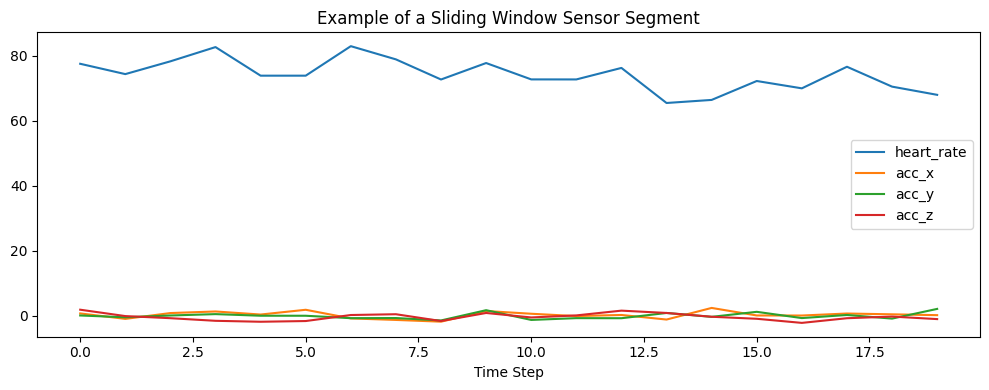

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 1. 生成模拟时间序列数
np.random.seed(42)  # 保证每次运行结果一致
time = np.arange(0, 300, 0.5)  # 模拟 300 秒，每 0.5 秒采样
heart_rate = np.random.normal(loc=75, scale=5, size=len(time))  # 模拟心率数据
acc_x = np.random.normal(loc=0, scale=1, size=len(time))        # 加速度 X
acc_y = np.random.normal(loc=0, scale=1, size=len(time))        # 加速度 Y
acc_z = np.random.normal(loc=0, scale=1, size=len(time))        # 加速度 Z

# 模拟三类活动标签
activities = np.random.choice(['sitting', 'walking', 'standing'], size=len(time), p=[0.3, 0.4, 0.3])

# 创建 DataFrame
df = pd.DataFrame({
    'time': time,
    'heart_rate': heart_rate,
    'acc_x': acc_x,
    'acc_y': acc_y,
    'acc_z': acc_z,
    'activity': activities
})

print("原始数据示例：")
print(df.head())

# 2. 滑动窗口切分数据（用于模型输入）
def create_windows(data, window_size=20, stride=10):
    windows = []
    labels = []
    for i in range(0, len(data) - window_size, stride):
        window = data.iloc[i:i+window_size]
        windows.append(window[['heart_rate', 'acc_x', 'acc_y', 'acc_z']].values)
        labels.append(window['activity'].mode()[0])  # 取窗口中最常出现的活动
    return np.array(windows), labels

X, y = create_windows(df, window_size=20, stride=10)

# 标签编码（例如可用于分类模型）
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"\n生成了 {X.shape[0]} 个窗口，每个窗口大小为 {X.shape[1]} 步 x {X.shape[2]} 特征")
print(f"标签示例（前5个）: {y[:5]} -> 编码后: {y_encoded[:5]}")

# 3. 可视化一个窗口样例（可选）
plt.figure(figsize=(10, 4))
plt.plot(X[0])
plt.title("Example of a Sliding Window Sensor Segment")
plt.xlabel("Time Step")
plt.legend(['heart_rate', 'acc_x', 'acc_y', 'acc_z'])
plt.tight_layout()
plt.show()
